# Running stardate on simulated stars

Testing the code on data simulated in the Simulate_data.ipynb notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import h5py
import tqdm
import emcee

from isochrones.mist import MIST_Isochrone
from isochrones import StarModel
mist = MIST_Isochrone()

import stardate as sd
from stardate.lhf import lnprob

plotpar = {'axes.labelsize': 25,
           'font.size': 25,
           'legend.fontsize': 25,
           'xtick.labelsize': 25,
           'ytick.labelsize': 25,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the simulated data file and plot it on an HR diagram.

In [2]:
df = pd.read_csv("data/simulated_data.csv")

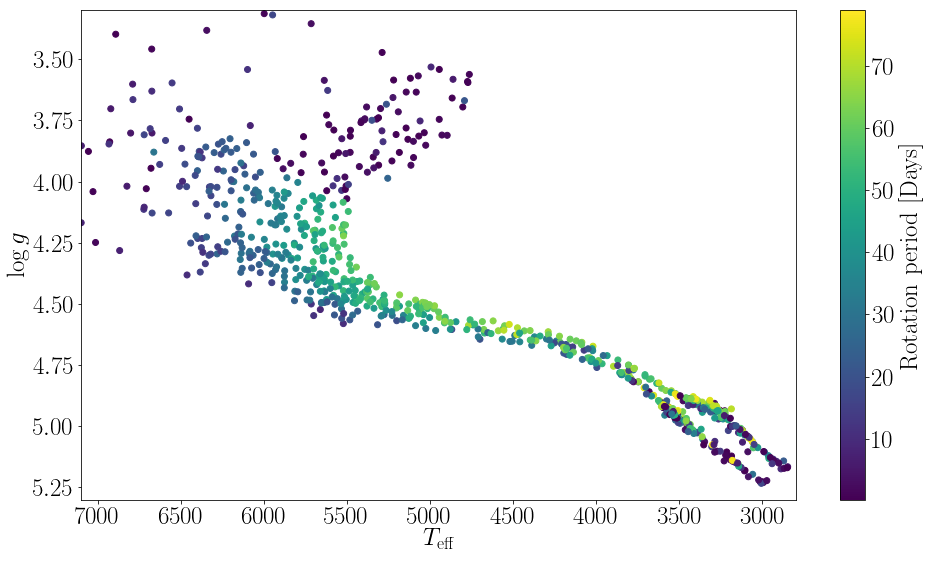

In [3]:
plt.figure(figsize=(16, 9))
plt.scatter(df.teff, df.logg, c=df.prot)
plt.ylim(5.3, 3.3)
plt.xlim(7100, 2800)
plt.xlabel("$T_{\mathrm{eff}}$")
plt.ylabel("$\log g$")
plt.colorbar(label="$\mathrm{Rotation~period~[Days]}$")

Small observational uncertainties are needed (even though the stars weren't simulated with any) in order to get a good fit.

In [4]:
teff_err = 25  # Kelvin
logg_err = .05  # dex
feh_err = .05  # dex
jmag_err = .01 # mags
hmag_err = .01  # mags
kmag_err = .01  # mags
parallax_err = .05  # milliarcseconds
prot_err = 1  # Days
BV_err = .01  # mags

# Recover stellar parameters of simulated stars

Define the dictionary of observables.

In [5]:
# iso_params = pd.DataFrame(dict({"teff": (df.teff[i], teff_err),
#                                 "logg": (df.logg[i], logg_err),
#                                 "feh": (df.feh[i], feh_err), 
#                                 "jmag": (df.jmag[i], jmag_err),
#                                 "hmag": (df.hmag[i], hmag_err),
#                                 "kmag": (df.kmag[i], kmag_err),
#                                 "parallax": (df.parallax[i], parallax_err)}))

Test the likelihood function.

In [ ]:
# i = 1
# mod = StarModel(mist, **iso_params)  # Set up the StarModel isochrones object.
# args = [mod, df.prot[i], 1, False]  # the lnprob arguments]

# lnparams = [df.eep.values[i], df.age.values[i], df.feh.values[i], 
#             np.log(df.d_kpc.values[i]*1e3) + .2, df.Av.values[i]]
# bad_lnprob = lnprob(lnparams, *args)
# print(bad_lnprob)

# lnparams = [df.eep.values[i], df.age.values[i], df.feh.values[i], 
#             np.log(df.d_kpc.values[i]*1e3), df.Av.values[i]]
# good_lnprob = lnprob(lnparams, *args)
# print(good_lnprob)

# assert bad_lnprob[0] < good_lnprob[0], "True parameters values must give a higher likelihood than wrong values"

Infer ages of the simulated stars. WARNING: this will take a long time to run!

In [ ]:
# The directory where the posterior samples and result plots will be saved.
savedir = "simulation_results/iso_and_gyro"
savedir_iso = "simulation_results/iso_only"

N = len(df)
for i in range(N):
    print(i, "of", N)

    # Set up the parameter dictionary. 
    iso_params = {"teff": (df.teff[i], teff_err),
                  "logg": (df.logg[i], logg_err),
                  "feh": (df.feh[i], feh_err), 
                  "jmag": (df.jmag[i], jmag_err),
                  "hmag": (df.hmag[i], hmag_err),
                  "kmag": (df.kmag[i], kmag_err),
                  "parallax": (df.parallax[i], parallax_err)}
    
    # Infer an age with isochrones and gyrochronology.
    
    # Set up the star object
    star = sd.star(iso_params, df.prot[i], .01, savedir=savedir, suffix=i)
    
    # Run the MCMC
    sampler = star.fit()

    # Plot the chains and make a corner plot
    # Mass [M_sun], Age [log10(yrs)], [Fe/H] [dex], Distance [ln(pc)], A_v [R: 0-1]
    truths = [df.eep.values[i], df.age.values[i], df.feh.values[i], 
              np.log(df.d_kpc.values[i]*1e3), df.Av.values[i]]
    star.make_plots(truths, burnin=10000)
    
    # Now infer an age with isochrones only.
    
    # Set up the star object
    star_iso = sd.star(iso_params, df.prot[i], .01, savedir=savedir_iso, suffix=i)
    
    # Run the MCMC
    sampler = star_iso.fit(iso_only=True)
    
    # Plot the chains and make a corner plot
    truths = [df.eep.values[i], df.age.values[i], df.feh.values[i], 
              df.d_kpc.values[i]*1e3, df.Av.values[i]]
    star_iso.make_plots(truths, burnin=10000)

0 of 867


  0%|          | 73/100000 [00:01<30:22, 54.84it/s]/Users/ruthangus/anaconda/lib/python3.5/site-packages/isochrones-1.2.2.dev0-py3.5.egg/isochrones/starmodel.py:523: RuntimeWarning: divide by zero encountered in log
  mass_lnprior = np.log(self.prior('mass', masses[0]))
 16%|█▋        | 16300/100000 [05:02<23:16, 59.95it/s]  


nsteps =  16300 burnin =  10000
Plotting age posterior
Plotting production chains...
Making corner plot...


  0%|          | 74/100000 [00:01<24:56, 66.79it/s]/Users/ruthangus/anaconda/lib/python3.5/site-packages/isochrones-1.2.2.dev0-py3.5.egg/isochrones/starmodel.py:523: RuntimeWarning: divide by zero encountered in log
  mass_lnprior = np.log(self.prior('mass', masses[0]))
100%|██████████| 100000/100000 [59:52<00:00, 54.00it/s] 


nsteps =  100000 burnin =  10000
Plotting age posterior
Plotting production chains...
Making corner plot...
1 of 867


  0%|          | 69/100000 [00:00<20:05, 82.92it/s]/Users/ruthangus/anaconda/lib/python3.5/site-packages/isochrones-1.2.2.dev0-py3.5.egg/isochrones/starmodel.py:523: RuntimeWarning: divide by zero encountered in log
  mass_lnprior = np.log(self.prior('mass', masses[0]))
 22%|██▏       | 21800/100000 [05:35<20:05, 64.88it/s] 


nsteps =  21800 burnin =  10000
Plotting age posterior
Plotting production chains...
Making corner plot...


  0%|          | 73/100000 [00:00<18:50, 88.38it/s]/Users/ruthangus/anaconda/lib/python3.5/site-packages/isochrones-1.2.2.dev0-py3.5.egg/isochrones/starmodel.py:523: RuntimeWarning: divide by zero encountered in log
  mass_lnprior = np.log(self.prior('mass', masses[0]))
 20%|█▉        | 19900/100000 [04:32<15:25, 86.56it/s]


nsteps =  19900 burnin =  10000
Plotting age posterior
Plotting production chains...
Making corner plot...
2 of 867


  0%|          | 70/100000 [00:00<21:32, 77.30it/s]/Users/ruthangus/anaconda/lib/python3.5/site-packages/isochrones-1.2.2.dev0-py3.5.egg/isochrones/starmodel.py:523: RuntimeWarning: divide by zero encountered in log
  mass_lnprior = np.log(self.prior('mass', masses[0]))
 89%|████████▉ | 89096/100000 [44:53<03:14, 56.04it/s]  